In [1]:
import sys
import os
import matplotlib
import matplotlib.pyplot as plt


sys.path.append(r"C:\Users\pgrover\Documents\code\pymorph")
import weno_morph_model as wmm
import schemes.weno as weno
import numpy as np
from scipy.signal import savgol_filter
import sediment_transport.sed_trans as st
%load_ext cython
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams.update(plt.rcParamsDefault)
#plt.style.use('classic')

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


# 2018-12-12 Paper 1 Modelling

In [3]:
D50 = 0.25/1000.
model = wmm.UpwindMorphologicalModel(D50)
casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'
bed_filepath = os.path.join(casefolder, 'modified_flume_profile_plus0.05_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)

['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


## 6 cm flow depth

### LS Model Run

No handles with labels found to put in legend.


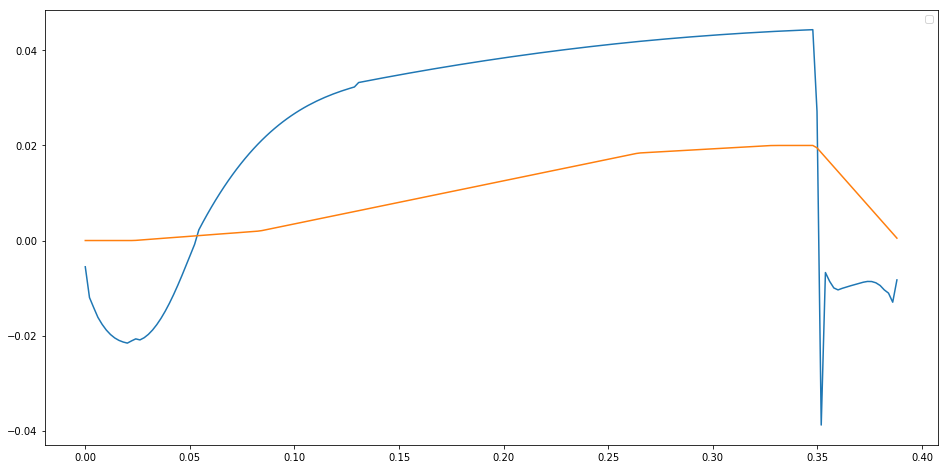

In [4]:
bed_shear_filepath = os.path.join(casefolder,'6cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)
plt.figure(figsize=[16,8])
#plt.style.use('dark_background')
#plt.style.use('classic')
plt.plot(xc,bed_shear_stress/10.)
plt.plot(xc, zbed)
plt.legend()

## 6cm LS-k-e Model

 Starting simulation....
Number of time steps: 120
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.44357
qbedload shape: (194,)
Max qbedload = 1.3260633954429213e-06
 Done
 ----------------------------


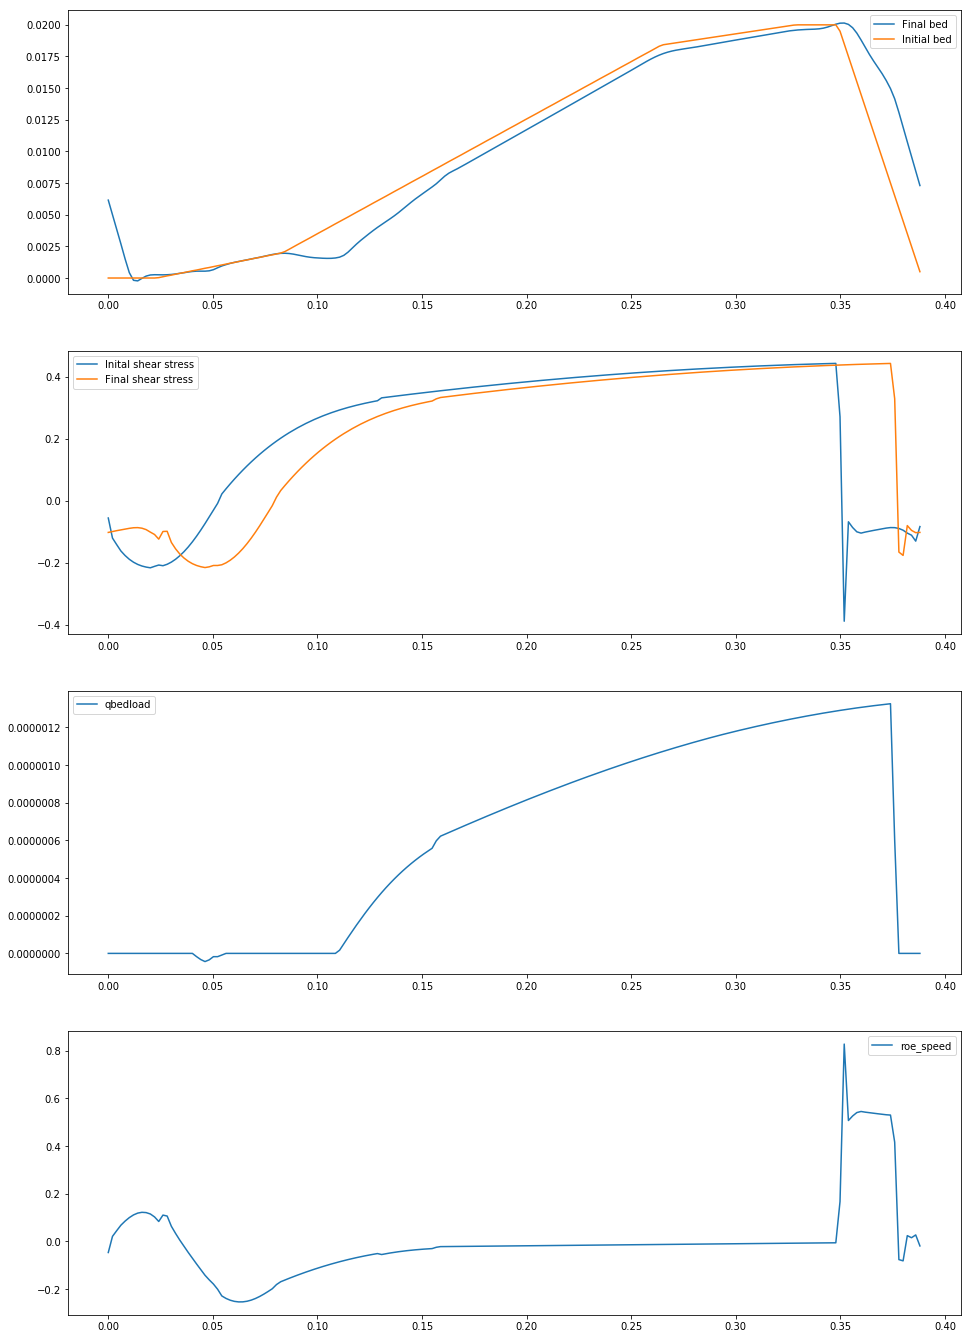

In [5]:
model = None
bed_shear_filepath = os.path.join(casefolder,'6cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress.copy(), zbed.copy(), xc, dx,useSmoother=True, adjustment_angle=28.)
simulationTime = 120
dt = 1

zc_lske_6cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zc_lske_6cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
#axs[0].set_xlim([0.075, 0.125])
axs[0].legend(prop=None)

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
#axs[1].set_xlim([0.075, 0.125])
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, bedShear-bed_shear_stress, label='roe_speed')
axs[3].legend()

## 6cm Run k-omega SST

 Starting simulation....
Number of time steps: 120
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.39203
qbedload shape: (194,)
Max qbedload = 9.787036235495249e-07
 Done
 ----------------------------


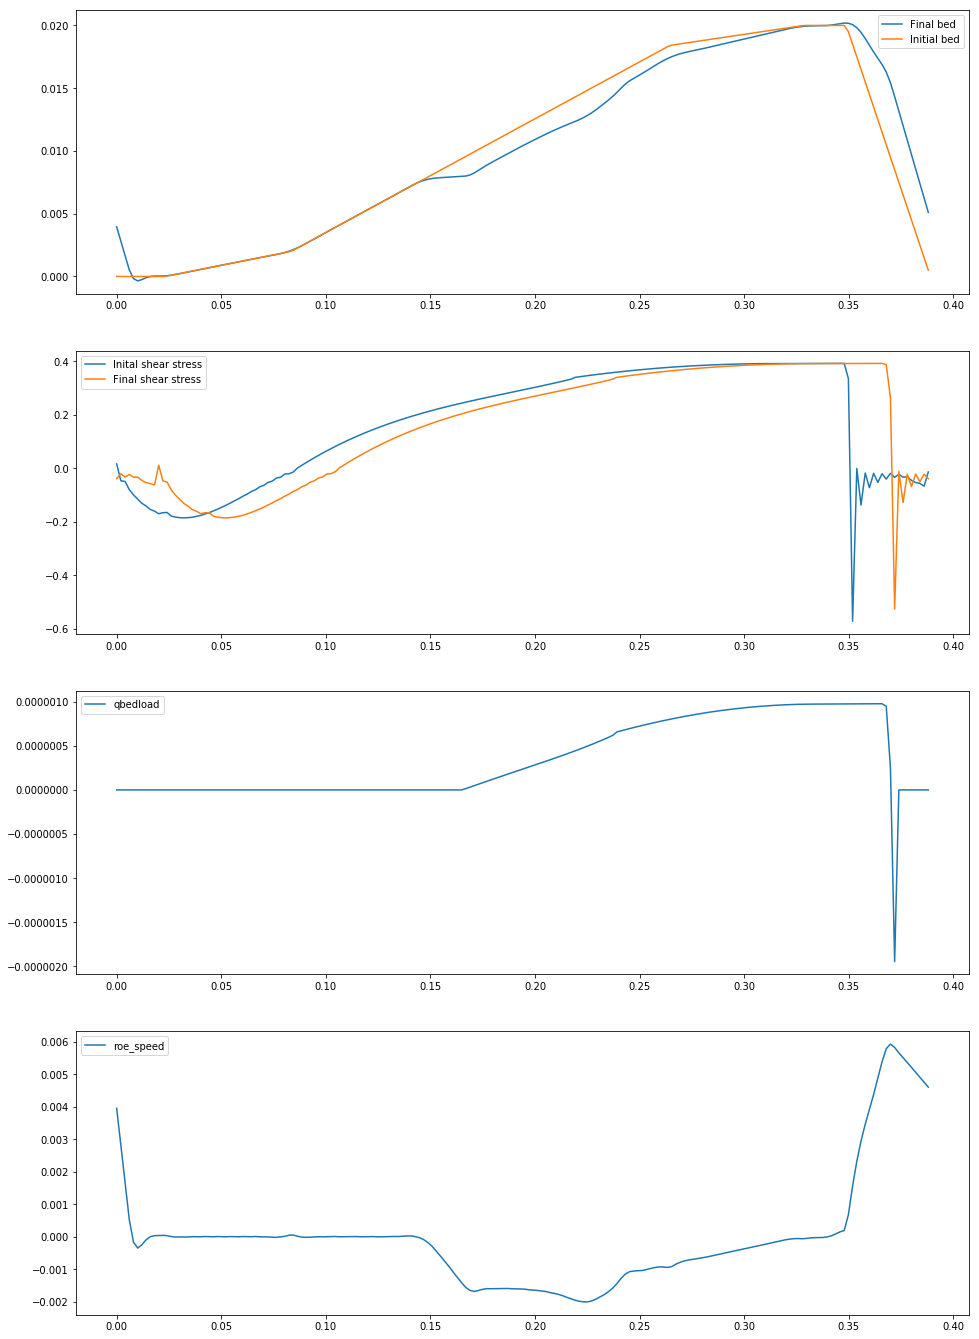

In [6]:
xmodel = None
bed_shear_filepath = os.path.join(casefolder,'6cm', 'kwsst_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress.copy(), zbed.copy(), xc, dx,useSmoother=True, adjustment_angle=28.)

zc_kwsst_6cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zc_kwsst_6cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
#axs[0].set_xlim([0.075, 0.125])
axs[0].legend()

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
#axs[1].set_xlim([0.075, 0.125])
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, zc_kwsst_6cm-zbed, label='roe_speed')
axs[3].legend()

## 12 cm Run L-S k-e

 Starting simulation....
Number of time steps: 30
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.9921
qbedload shape: (194,)
Max qbedload = 6.51960318380741e-06
 Done
 ----------------------------


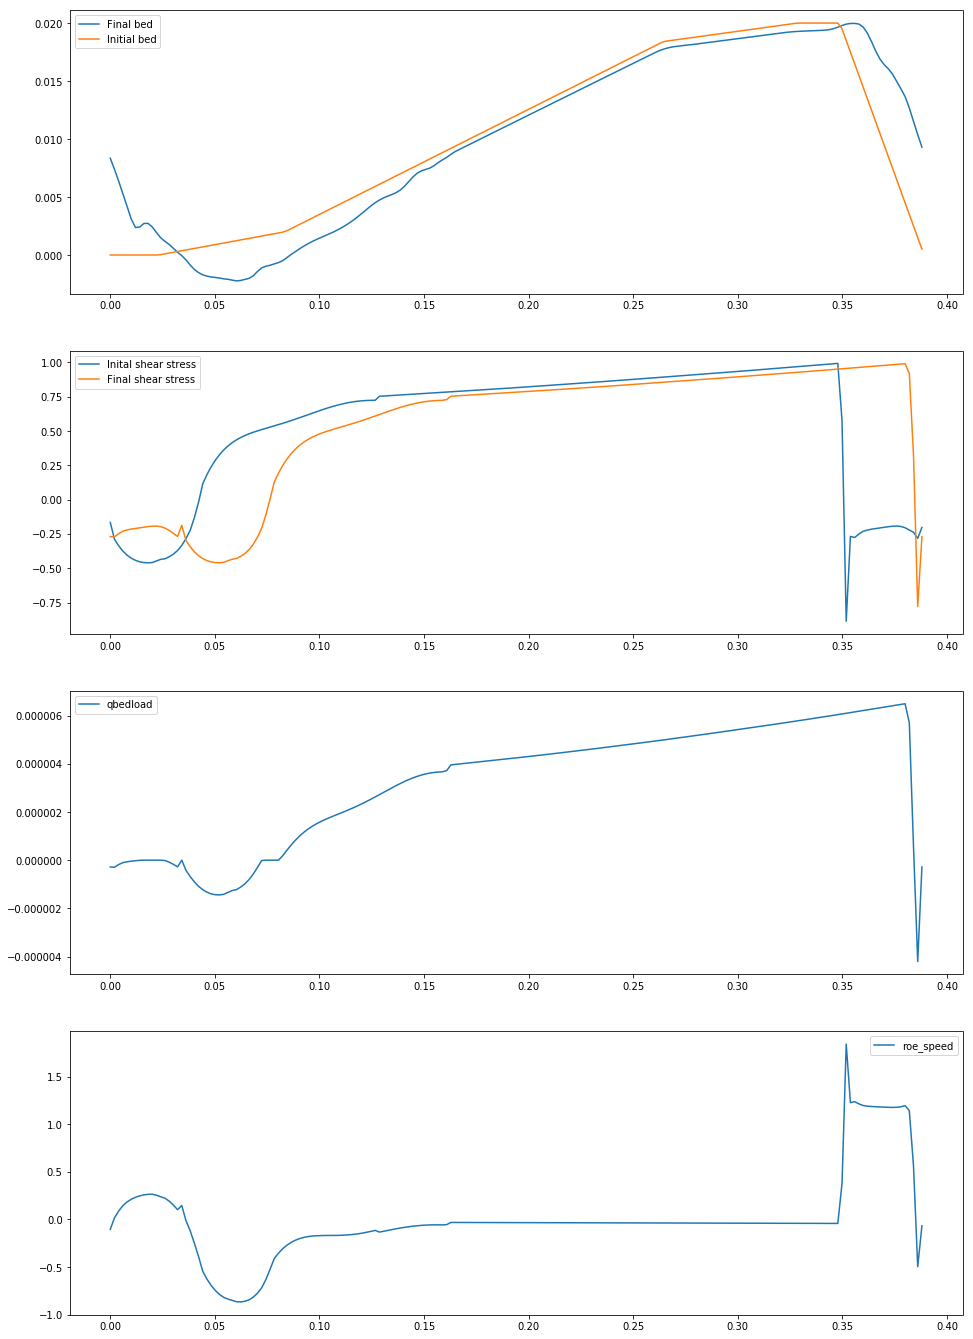

In [7]:
model = None
bed_shear_filepath = os.path.join(casefolder,'12cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress.copy(), zbed.copy(), xc, dx,useSmoother=True, adjustment_angle=28.)
simulationTime = 30
dt = 1

zc_lske_12cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zc_lske_12cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
#axs[0].set_xlim([0.075, 0.125])
axs[0].legend(prop=None)

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
#axs[1].set_xlim([0.075, 0.125])
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, bedShear-bed_shear_stress, label='roe_speed')
axs[3].legend()

 Starting simulation....
Number of time steps: 30
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.85964
qbedload shape: (194,)
Max qbedload = 5.049069380564836e-06
 Done
 ----------------------------


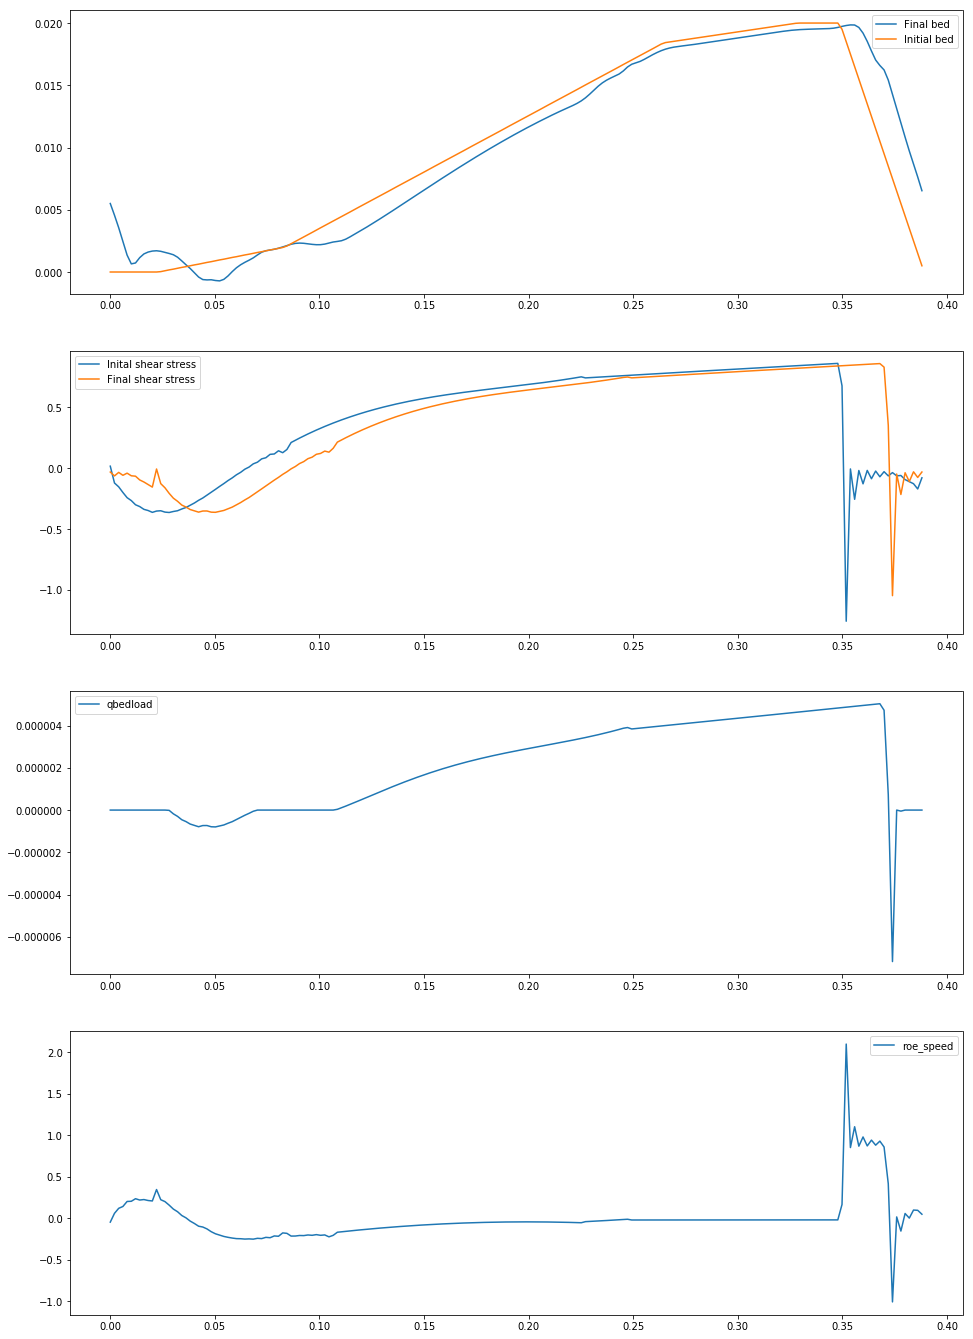

In [8]:
model = None
bed_shear_filepath = os.path.join(casefolder,'12cm', 'kwsst_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress.copy(), zbed.copy(), xc, dx,useSmoother=True, adjustment_angle=28.)
simulationTime = 30
dt = 1

zc_kwsst_12cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zc_kwsst_12cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
#axs[0].set_xlim([0.075, 0.125])
axs[0].legend(prop=None)

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
#axs[1].set_xlim([0.075, 0.125])
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, bedShear-bed_shear_stress, label='roe_speed')
axs[3].legend()

## Plots for Paper

In [67]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Serif'

plt.rcParams.usetex=True

from scipy.signal import savgol_filter
zc_kwsst_6cm_smooth = savgol_filter(zc_kwsst_6cm, 21, 2)
zc_lske_6cm_smooth = savgol_filter(zc_lske_6cm, 21, 2)

output_folder = r'C:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\Images\v16'

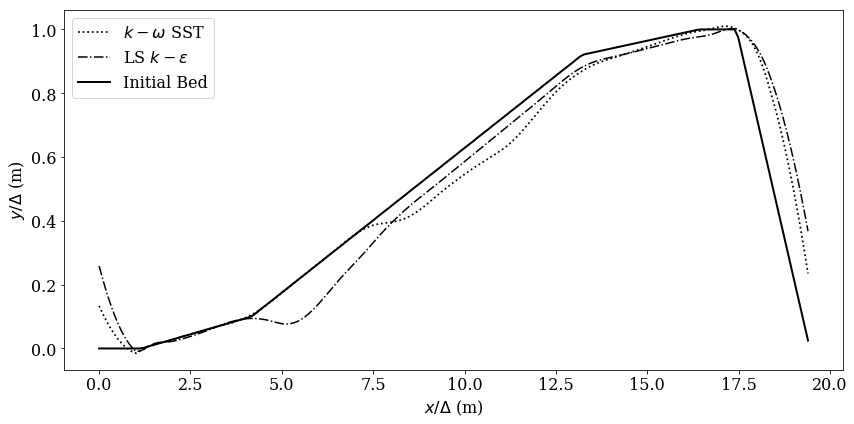

In [73]:
plt.figure(figsize=[12,6])
plt.plot(xc/0.02, zc_kwsst_6cm_smooth/0.02, label='$k-\omega$ SST', color='k', linestyle=':', linewidth=1.750)
plt.plot(xc/0.02, zc_lske_6cm_smooth/0.02, label='LS $k-\epsilon$', color='k', linestyle='-.')
plt.plot(xc/0.02, zbed/0.02, label='Initial Bed', color='k', linewidth=2.0 )


ax = plt.gca()
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(25)

plt.xlabel('$x/\Delta$ (m)', fontsize=16)
plt.ylabel('$y/\Delta$ (m)', fontsize=16)

    
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

output_folder
plt.savefig(os.path.join(output_folder, '6cm_bed_changes.png'), dpi=300)
plt.savefig(os.path.join(output_folder, '6cm_bed_changes.eps'), format='eps', dpi=300)

In [69]:
zc_kwsst_12cm_smooth = savgol_filter(zc_kwsst_12cm, 21, 2)
zc_lske_12cm_smooth = savgol_filter(zc_lske_12cm, 21, 2)

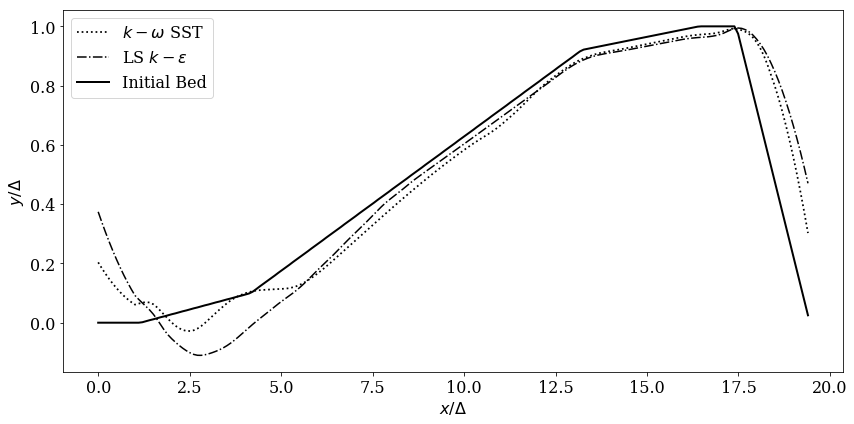

In [72]:
plt.figure(figsize=[12,6])
plt.plot(50.*xc, zc_kwsst_12cm_smooth/0.02, label='$k-\omega$ SST', color='k', linestyle=':', linewidth=1.750)
plt.plot(50.*xc, zc_lske_12cm_smooth/0.02, label='LS $k-\epsilon$', color='k', linestyle='-.')
plt.plot(50.*xc, zbed/0.02, label='Initial Bed', color='k', linewidth=2.0 )

ax = plt.gca()
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(25)

plt.xlabel('$x/\Delta$', fontsize=16)
plt.ylabel('$y/\Delta$', fontsize=16)

    
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.savefig(os.path.join(output_folder, '12cm_bed_changes.png'), dpi=300)
plt.savefig(os.path.join(output_folder, '12cm_bed_changes.eps'), format='eps', dpi=300)

In [37]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}  x, y</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))